https://realpython.com/python-for-data-analysis/#acquiring-your-data

In [3]:
import pandas as pd
james_bond_data = pd.read_csv("james_bond_data.csv")
james_bond_data.info()
james_bond_data = pd.read_csv("james_bond_data.csv").convert_dtypes()
james_bond_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Release           27 non-null     object 
 1   Movie             27 non-null     object 
 2   Bond              27 non-null     object 
 3   Bond_Car_MFG      27 non-null     object 
 4   US_Gross          27 non-null     object 
 5   World_Gross       27 non-null     object 
 6   Budget ($ 000s)   27 non-null     object 
 7   Film_Length       27 non-null     object 
 8   Avg_User_IMDB     26 non-null     float64
 9   Avg_User_Rtn_Tom  26 non-null     float64
 10  Martinis          27 non-null     int64  
 11  Kills_Bond        27 non-null     int64  
dtypes: float64(2), int64(2), object(8)
memory usage: 2.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            ----

In [6]:
james_bond_data.head()

,Release,Movie,Bond,Bond_Car_MFG,US_Gross,World_Gross,Budget ($ 000s),Film_Length,Avg_User_IMDB,Avg_User_Rtn_Tom,Martinis,Kills_Bond
0,"June, 1962",Dr. No,Sean Connery,Sunbeam,"$16,067,035.00","$59,567,035.00","$1,000.00",110 mins,7.3,7.7,2,4
1,"August, 1963",From Russia with Love,Sean Connery,Bentley,"$24,800,000.00","$78,900,000.00","$2,000.00",115 mins,7.5,8.0,0,11
2,"May, 1964",Goldfinger,Sean Connery,Aston Martin,"$51,100,000.00","$124,900,000.00","$3,000.00",110 mins,7.8,8.4,1,9
3,"September, 1965",Thunderball,Sean Connery,Aston Martin,"$63,600,000.00","$141,200,000.00","$9,000.00",130 mins,7.0,6.8,0,20
4,"November, 1967",You Only Live Twice,Sean Connery,Toyota,"$43,100,000.00","$111,600,000.00","$9,500.00",117 mins,6.9,6.3,1,21


Cleansing Your Data With Python
To make sure that it’s free from poorly formatted, incorrect, duplicated, or incomplete data
1. Creating Meaningful Column Names
2. Dealing With Missing Data
3. some data columns have incorrect data types
4. Correcting Invalid Data Types
        release date, is also a string. This should be a date type
        Spelling Checks in data
4. Removing Duplicates 
5. Handling Text Data
6. Converting Categorical Variables to Numeric Form
7. Splitting Large Datasets into Smaller Chunks for Processing
8. Checking For Outliers and Managing Them Appropriately
        Checking for Invalid Outliers
9. Normalizing/Standardizing the Data
The first step in cleaning your dataset is renaming your column names so they are more meaningful. This will help you understand what each variable represents when you come back to analyze your data later
10. Reducing Dimensionality Using Techniques Like Principal Component Analysis (PCA)

### Creating Meaningful Column Names
python provides a function called "rename" which can be used to rename columns in pandas dataframe. This is useful when column names are not meaningful or too long. Here's an example:
Column names should be descriptive of what they represent in order to facilitate understanding of your dataset
python provides a function called `rename()` which allows you to rename your dataframe's column names using dictionary matching. This can be very useful when dealing with large datasets where the column names are not meaning
A good column name should be descriptive of its content. It is important because:
- Helps in understanding what a particular variable represents.
- Makes debugging easier if something goes wrong.
- Enhances code readability.

In [10]:
# Creating Meaningful Column Names
new_column_names = {
    "Release": "release_date",
    "Movie": "movie_title",
    "Bond": "bond_actor",
    "Bond_Car_MFG": "car_manufacturer",
    "US_Gross": "income_usa",
    "World_Gross": "income_world",
    "Budget ($ 000s)": "movie_budget",
    "Film_Length": "film_length",
    "Avg_User_IMDB": "imdb",
    "Avg_User_Rtn_Tom": "rotten_tomatoes",
    "Martinis": "martinis_consumed",
    "Kills_Bond": "bond_kills",
   }

data = james_bond_data.rename(columns=new_column_names)
data.columns

Index(['release_date', 'movie_title', 'bond_actor', 'car_manufacturer',
       'income_usa', 'income_world', 'movie_budget', 'film_length', 'imdb',
       'rotten_tomatoes', 'martinis_consumed', 'bond_kills'],
      dtype='object')

In [11]:
# Dealing With Missing Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       27 non-null     string 
 1   movie_title        27 non-null     string 
 2   bond_actor         27 non-null     string 
 3   car_manufacturer   27 non-null     string 
 4   income_usa         27 non-null     string 
 5   income_world       27 non-null     string 
 6   movie_budget       27 non-null     string 
 7   film_length        27 non-null     string 
 8   imdb               26 non-null     Float64
 9   rotten_tomatoes    26 non-null     Float64
 10  martinis_consumed  27 non-null     Int64  
 11  bond_kills         27 non-null     Int64  
dtypes: Float64(2), Int64(2), string(8)
memory usage: 2.8 KB


In [14]:
data.loc[data.isna().any(axis="columns")]

,release_date,movie_title,bond_actor,car_manufacturer,income_usa,income_world,movie_budget,film_length,imdb,rotten_tomatoes,martinis_consumed,bond_kills
10,"April, 1977",The Spy Who Loved Me,Roger Moore,Lotus,"$46,800,000.00","$185,400,000.00","$14,000.00",125 mins,<NA>,<NA>,1,31


In [27]:
data = james_bond_data.rename(columns=new_column_names).combine_first(
    pd.DataFrame({"imdb": {10: 7.1}, "rotten_tomatoes": {10: 6.8}})
)
data

,bond_actor,bond_kills,car_manufacturer,film_length,imdb,income_usa,income_world,martinis_consumed,movie_budget,movie_title,release_date,rotten_tomatoes
0,Sean Connery,4,Sunbeam,110 mins,7.3,"$16,067,035.00","$59,567,035.00",2,"$1,000.00",Dr. No,"June, 1962",7.7
1,Sean Connery,11,Bentley,115 mins,7.5,"$24,800,000.00","$78,900,000.00",0,"$2,000.00",From Russia with Love,"August, 1963",8.0
2,Sean Connery,9,Aston Martin,110 mins,7.8,"$51,100,000.00","$124,900,000.00",1,"$3,000.00",Goldfinger,"May, 1964",8.4
3,Sean Connery,20,Aston Martin,130 mins,7.0,"$63,600,000.00","$141,200,000.00",0,"$9,000.00",Thunderball,"September, 1965",6.8
4,Sean Connery,21,Toyota,117 mins,6.9,"$43,100,000.00","$111,600,000.00",1,"$9,500.00",You Only Live Twice,"November, 1967",6.3
5,George Lazenby,5,Mercury,142 mins,6.8,"$22,800,000.00","$82,000,000.00",1,"$8,000.00",On Her Majesty's Secret Service,"July, 1969",6.7
6,Shawn Connery,7,Ford,1200 mins,6.7,"$43,800,000.00","$116,000,000.00",0,"$7,200.00",Diamonds Are Forever,"March, 1971",6.3
7,Roger Moore,8,AMC,121 mins,6.8,"$35,400,000.00","$161,800,000.00",0,"$7,000.00",Live and Let Die,"August, 1973",5.9
8,Roger Moore,1,AMC,125 mins,6.7,"$21,000,000.00","$97,600,000.00",0,"$7,000.00",The Man with the Golden Gun,"July, 1974",5.1
9,Roger Moore,1,AMC,125 mins,6.7,"$21,000,000.00","$97,600,000.00",0,"$7,000.00",The Man with the Golden Gun,"July, 1974",5.1


In [75]:
data.loc[data.isna().any(axis="columns")]

,bond_actor,bond_kills,car_manufacturer,film_length,imdb,income_usa,income_world,martinis_consumed,movie_budget,movie_title,release_date,rotten_tomatoes,release_year


In [56]:
# some data columns have incorrect data types
# The income_usa, income_world, movie_budget, and film_length columns all have data types of string.
# However, these should all be numeric types because strings are of little use for calculations.
# we need to fix this by converting these columns from string type to numeric type. 
print(data[["income_usa", "income_world", "movie_budget", "film_length"]].head())


# load the dataset  

# Similarly, the release column, which contains the release date, is also a string. This should be a date type.

# release date, is also a string change it to a date type
# Use to_datetime() and also format string

## Fixing Inconsistencies in Data
    ## movie_buget column is updates w.r.t onther column data as this entry is in thousand and will cause problem while comparing with other financial column data
    ## Correcting Spelling Errors
print(data["bond_actor"].value_counts())

   income_usa  income_world  movie_budget  film_length
0  16067035.0    59567035.0     1000000.0          110
1  24800000.0    78900000.0     2000000.0          115
2  51100000.0   124900000.0     3000000.0          110
3  63600000.0   141200000.0     9000000.0          130
4  43100000.0   111600000.0     9500000.0          117
Roger Moore       7
Sean Connery      5
Daniel Craig      5
Pierce Brosnan    4
Timothy Dalton    3
George Lazenby    1
Shawn Connery     1
Roger MOORE       1
Name: bond_actor, dtype: Int64


In [67]:
print(data["bond_actor"].value_counts())
print(data["car_manufacturer"].value_counts())

Roger Moore       8
Sean Connery      6
Daniel Craig      5
Pierce Brosnan    4
Timothy Dalton    3
George Lazenby    1
Name: bond_actor, dtype: Int64
Aston Martin    10
AMC              3
Rolls Royce      3
Lotus            2
BMW              2
Sunbeam          1
Bentley          1
Toyota           1
Mercury          1
Ford             1
Citroen          1
Bajaj            1
Name: car_manufacturer, dtype: Int64


In [70]:
# Checking for Invalid Outliers
# verifying that the numerical data is in the correct range
# To make sure their values are within a sensible range. There are several ways that you could analyze numerical data to check for outliers.
# A quick way is to use the .describe() method
data[["film_length", "martinis_consumed"]].describe()

,film_length,martinis_consumed
count,27.0,27.0
mean,128.222222,1.074074
std,12.454018,1.268734
min,106.0,0.0
25%,120.5,0.0
50%,128.0,1.0
75%,132.0,1.0
max,163.0,6.0


In [78]:
# Removing Duplicate Data
# The easiest way to detect duplicates is to use the DataFrame’s .duplicated() method
data.loc[data.duplicated(keep=False)]

,bond_actor,bond_kills,car_manufacturer,film_length,imdb,income_usa,income_world,martinis_consumed,movie_budget,movie_title,release_date,rotten_tomatoes,release_year


In [76]:
data = (
    james_bond_data.rename(columns=new_column_names)
    .combine_first(
    pd.DataFrame({"imdb": {10: 7.1}, "rotten_tomatoes": {10: 6.8}})
    )
    .assign(
        # Handling Financial Columns
        income_usa=lambda data: (
            data["income_usa"]
            .replace("[$,]","",regex=True)
            .astype("Float64")
        ),
        income_world=lambda data: (
            data["income_world"]
            .replace("[$,]","",regex=True)
            .astype("Float64")
        ),
        movie_budget=lambda data: (
            data["movie_budget"]
            .replace("[$,]","",regex=True)
            .astype("Float64")
            *1000  # Fixing Inconsistencies in Data
        ),
        film_length=lambda data: (
            data["film_length"]
            #.replace("[mins]","",regex=True)
            .str.removesuffix("mins") ## Removing a substring , Correcting Invalid Data Types
            .astype("Int64")
            .replace(1200,120)  # Fixing Invalid outliners
        ),
        # Adjusting Dates
        release_date=lambda data: pd.to_datetime(
            data["release_date"], format="%B, %Y"
        ),
        release_year=lambda data: (
            data["release_date"]
            .dt.year
            .astype("Int64")
        ),
        # Correcting Spelling Errors
        bond_actor=lambda data:(
            data["bond_actor"]
            .str.replace("Shawn", "Sean")
            .str.replace("MOORE", "Moore")
        ),
        car_manufacturer=lambda data:(
            data["car_manufacturer"]
            .str.replace("Astin", "Aston")
        ),
        # Fixing Invalid outliners
        martinis_consumed=lambda data: (
            data["martinis_consumed"]
            .replace(-6,6)
        ),
    )
    .drop_duplicates(ignore_index=True)
)
data

,bond_actor,bond_kills,car_manufacturer,film_length,imdb,income_usa,income_world,martinis_consumed,movie_budget,movie_title,release_date,rotten_tomatoes,release_year
0,Sean Connery,4,Sunbeam,110,7.3,16067035.0,59567035.0,2,1000000.0,Dr. No,1962-06-01,7.7,1962
1,Sean Connery,11,Bentley,115,7.5,24800000.0,78900000.0,0,2000000.0,From Russia with Love,1963-08-01,8.0,1963
2,Sean Connery,9,Aston Martin,110,7.8,51100000.0,124900000.0,1,3000000.0,Goldfinger,1964-05-01,8.4,1964
3,Sean Connery,20,Aston Martin,130,7.0,63600000.0,141200000.0,0,9000000.0,Thunderball,1965-09-01,6.8,1965
4,Sean Connery,21,Toyota,117,6.9,43100000.0,111600000.0,1,9500000.0,You Only Live Twice,1967-11-01,6.3,1967
5,George Lazenby,5,Mercury,142,6.8,22800000.0,82000000.0,1,8000000.0,On Her Majesty's Secret Service,1969-07-01,6.7,1969
6,Sean Connery,7,Ford,120,6.7,43800000.0,116000000.0,0,7200000.0,Diamonds Are Forever,1971-03-01,6.3,1971
7,Roger Moore,8,AMC,121,6.8,35400000.0,161800000.0,0,7000000.0,Live and Let Die,1973-08-01,5.9,1973
8,Roger Moore,1,AMC,125,6.7,21000000.0,97600000.0,0,7000000.0,The Man with the Golden Gun,1974-07-01,5.1,1974
9,Roger Moore,31,Lotus,125,7.1,46800000.0,185400000.0,1,14000000.0,The Spy Who Loved Me,1977-04-01,6.8,1977


In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   bond_actor         25 non-null     string        
 1   bond_kills         25 non-null     Int64         
 2   car_manufacturer   25 non-null     string        
 3   film_length        25 non-null     Int64         
 4   imdb               25 non-null     Float64       
 5   income_usa         25 non-null     Float64       
 6   income_world       25 non-null     Float64       
 7   martinis_consumed  25 non-null     Int64         
 8   movie_budget       25 non-null     Float64       
 9   movie_title        25 non-null     string        
 10  release_date       25 non-null     datetime64[ns]
 11  rotten_tomatoes    25 non-null     Float64       
 12  release_year       25 non-null     Int64         
dtypes: Float64(5), Int64(4), datetime64[ns](1), string(3)
memory usage:

In [ ]:

print(data["bond_actor"].value_counts())
print(data["car_manufacturer"].value_counts())

In [83]:
# Storing Your Cleansed Data
data.to_csv("james_bond_data_cleansed.csv", index=False)

Performing Data Analysis Using Python
Descriptive analysis uses previous data to explain what’s happened in the past. Common examples include identifying sales trends or your customers’ behaviors.

Diagnostic analysis takes things a stage further and tries to find out why those events have happened. For example, why did the sales trend occur? And why exactly did your customers do what they did?

Predictive analysis builds on the previous analysis and uses techniques to try and predict what might happen in the future. For example, what do you expect future sales trends to do? Or what do you expect your customers to do next?

Prescriptive analysis takes everything discovered by the earlier analysis types and uses that information to formulate a future strategy. For example, you might want to implement measures to prevent sales trend predictions from falling or to prevent your customers from purchasing elsewhere.

In [95]:
%%python3
! -m pip install matplotlib scikit-learn^

  File "<stdin>", line 1
    ! -m pip install matplotlib scikit-learn^
    ^
SyntaxError: invalid syntax


CalledProcessError: Command 'b'! -m pip install matplotlib scikit-learn^\n'' returned non-zero exit status 1.

In [96]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("james_bond_data_cleansed.csv").convert_dtypes()


/tmp/ipykernel_111210/148083164.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


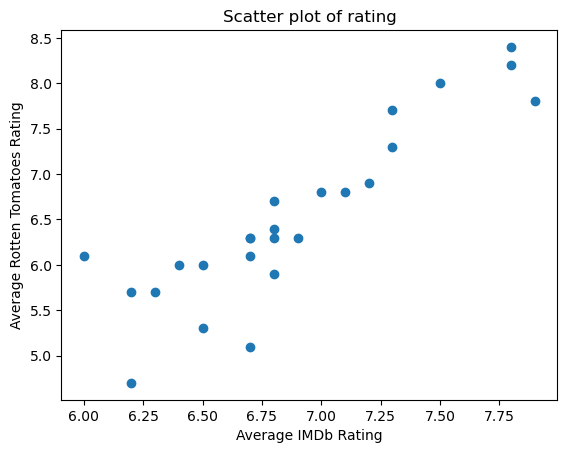

In [97]:
## Scatterplot
fig,ax = plt.subplots()
ax.scatter(data["imdb"],data["rotten_tomatoes"])
ax.set_title("Scatter plot of rating")
ax.set_xlabel("Average IMDb Rating")
ax.set_ylabel("Average Rotten Tomatoes Rating")
fig.show()


In [118]:
!/home/richa-mishra/Desktop/Python\ Programming/Data\ Visualization/.venv/bin/python -m pip install scikit-learn

/tmp/ipykernel_111210/813507132.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


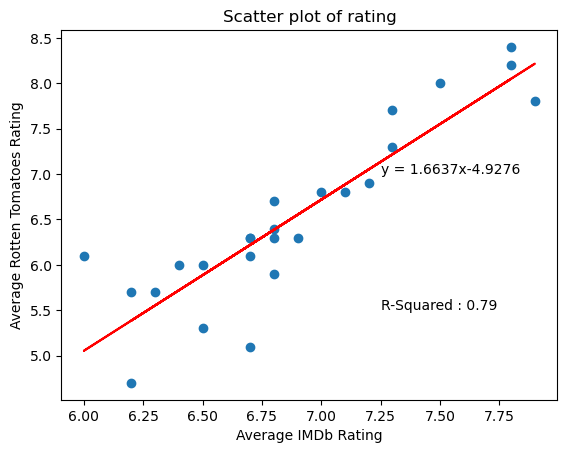

In [120]:
from sklearn.linear_model import LinearRegression
x = data.loc[:, ["imdb"]]
y = data.loc[:, "rotten_tomatoes"]

model=LinearRegression()
model.fit(x,y)

# Predicting the test set results
r_squared = f"R-Squared : {model.score(x,y):.2f}"
best_fit = f"y = {model.coef_[0]:.4f}x{model.intercept_:+.4f}"
y_pred=model.predict(x)

fig,ax = plt.subplots()
ax.scatter(x,y)
ax.plot(x,y_pred,color="red")
ax.text(7.25,5.5,r_squared,fontsize=10)
ax.text(7.25,7,best_fit,fontsize=10)
ax.set_title("Scatter plot of rating")
ax.set_xlabel("Average IMDb Rating")
ax.set_ylabel("Average Rotten Tomatoes Rating")
fig.show()

/tmp/ipykernel_111210/3767300582.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


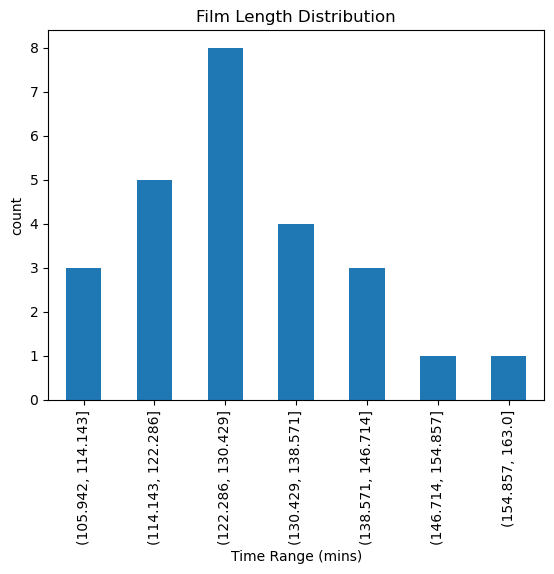

In [124]:
## Investigating a Statistical Distribution
# Insight on the lengths of the movies

fig,ax=plt.subplots()
length = data["film_length"].value_counts(bins=7).sort_index()
length.plot.bar(
    ax=ax,
    title="Film Length Distribution",
    xlabel="Time Range (mins)",
    ylabel="count"
)
fig.show()


In [123]:
data["film_length"].value_counts(bins=7).sort_index()

(105.942, 114.143]    3
(114.143, 122.286]    5
(122.286, 130.429]    8
(130.429, 138.571]    4
(138.571, 146.714]    3
(146.714, 154.857]    1
(154.857, 163.0]      1
Name: film_length, dtype: int64

In [125]:
data["film_length"].agg(["min", "max", "mean", "std"])

min     106.000000
max     163.000000
mean    128.280000
std      12.940634
Name: film_length, dtype: float64

/tmp/ipykernel_111210/1067135981.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


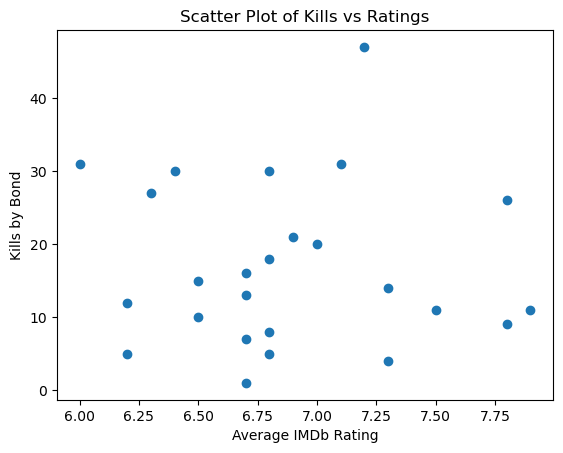

In [126]:
## relationship between a movie’s user rating and the number of kills that Bond achieves in it
fig, ax = plt.subplots()
ax.scatter(data["imdb"], data["bond_kills"])
ax.set_title("Scatter Plot of Kills vs Ratings")
ax.set_xlabel("Average IMDb Rating")
ax.set_ylabel("Kills by Bond")
fig.show()

# The scatterplot shows you that the data is randomly distributed

In [ ]:
'''
def convert_data_type(df):
    # check the data type of column 'age'
    if df['age'].dtypes == np.object:
        # convert the column 'age' from string type to numeric type
        df['age'] = pd.to_numeric(df['age'])
    return df
'''